**FINAL PROJECT DATA SCIENCE - FEBY SUKMA AULIA**

**Dataset Understanding**
> Dataset yang kamu pakai adalah Predict Online Course Engagement Dataset dari Kaggle, dibuat oleh rabieelkharoua. Dataset ini merekam metrik keterlibatan pengguna pada platform kursus online dengan tujuan menganalisis faktor-faktor apa saja yang berkontribusi terhadap penyelesaian kursus.

> Setiap baris dalam dataset mewakili satu pengguna kursus online, dan kolom-kolomnya menggambarkan metrik perilaku belajar seperti durasi belajar, jumlah video ditonton, skor kuis, dan persentase penyelesaian materi. Data ini sangat berguna untuk memahami pola engagement dan prediksi siapa saja yang kemungkinan besar akan menyelesaikan kursus.

-----------------------------------------------------------------------------

**Dataset Features**
| Feature | Deskripsi |
|--------|-----------|
| `UserID` | ID unik untuk setiap pengguna |
| `CourseCategory` | Kategori kursus yang diikuti (misal: Programming, Business, Arts) |
| `TimeSpentOnCourse` | Total waktu yang dihabiskan pengguna pada kursus (dalam jam) |
| `NumberOfVideosWatched` | Jumlah total video yang telah ditonton oleh pengguna |
| `NumberOfQuizzesTaken` | Total kuis yang diambil selama mengikuti kursus |
| `QuizScores` | Rata-rata skor kuis yang diperoleh pengguna (dalam persen) |
| `CompletionRate` | Persentase progress kursus yang berhasil diselesaikan pengguna |
| `DeviceType` | Jenis perangkat yang digunakan (0 = Desktop, 1 = Mobile) |
| `CourseCompletion` | **Target**: status penyelesaian kursus (0 = Not Completed, 1 = Completed) |


-----------------------------------------------------------------------------

**Goals**
> - Membangun model machine learning untuk memprediksi tingkat keterlibatan peserta online course berdasarkan fitur-fitur yang tersedia.
> - Mengidentifikasi fitur mana yang paling berpengaruh dalam menentukan apakah peserta tergolong engaged atau tidak.






# (1). Setup Library

In [1]:
#Library for analysis data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Library for Splitting data
from sklearn.model_selection import train_test_split

#Library for preprocessing and pipelines
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

#Library for model machine learning prediction
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Parameter grid
from sklearn.model_selection import GridSearchCV

#Library for evaluastion Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [1]:
!pip install scipy==1.11.4
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install lime

  Using cached numpy-2.3.5-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached numpy-2.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
  Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
Using cached numpy-2.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.2 MB)
Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4


In [1]:
!pip install numpy==1.24.4 --force-reinstall
!pip install scipy==1.11.4 --force-reinstall

  Using cached numpy-1.24.4.tar.gz (10.9 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
  Using cached scipy-1.11.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached scipy-1.11.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (35.8 MB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB

# (2). Load Dataset

In [3]:
#load dataset stroke
df = pd.read_csv('/content/online_course_engagement_data.csv')
df.head(15)

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
5,8650,Health,79.466129,12,7,70.233329,76.484023,0,1
6,4321,Health,78.908724,10,2,86.836533,22.588896,1,0
7,4589,Business,12.068237,16,3,61.553646,27.410991,1,0
8,4215,Business,81.935709,8,4,90.264564,33.308437,0,1
9,8089,Programming,83.394026,15,10,63.956353,33.261300,1,0


In [4]:
#cek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


dari hasil output `df.info` menunjukkan informasi :
* Entries Dataset ada 9000 data
* Terdapat 9 features dataset



# (3). Data Cleaning

In [5]:
#cek missing value
df.isna().sum()

,0
UserID,0
CourseCategory,0
TimeSpentOnCourse,0
NumberOfVideosWatched,0
NumberOfQuizzesTaken,0
QuizScores,0
CompletionRate,0
DeviceType,0
CourseCompletion,0


tidak terdapat missing value

In [6]:
#cek duplicate data
df.duplicated().sum()

877

terdapat data duplicate sebanyak 877. Pada proses ini kita lakukan drop data yang duplicate

In [7]:
#drop data duplikat
df.drop_duplicates(inplace=True)

# (4). EDA

In [8]:
df.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
mean,4504.687185,50.607728,10.148098,5.166933,75.091084,51.190873,0.500431,0.439247
std,2604.220672,28.364184,5.987972,3.132108,14.339876,29.069716,0.500031,0.496326
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2248.500000,26.114631,5.000000,2.000000,62.791226,26.276765,0.000000,0.000000
50%,4492.000000,50.316921,10.000000,5.000000,75.273913,51.581186,1.000000,0.000000
75%,6766.500000,75.377730,15.000000,8.000000,87.497542,76.729629,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


In [9]:
kol_kat = ['CourseCategory', 'DeviceType', 'CourseCompletion' ]

for col in kol_kat:
  print(f'=================={col}==================')
  display(df[col].value_counts())
  print(f'Total Entries {df[col].count()}')
  print()

==================CourseCategory==================


,count
CourseCategory,
Business,1657
Health,1634
Programming,1633
Science,1629
Arts,1570


Total Entries 8123

==================DeviceType==================


,count
DeviceType,
1,4065
0,4058


Total Entries 8123

==================CourseCompletion==================


,count
CourseCompletion,
0,4555
1,3568


Total Entries 8123



In [10]:
#persentase jumlah kolom target
df['CourseCompletion'].value_counts(normalize=True)

,proportion
CourseCompletion,
0,0.560753
1,0.439247


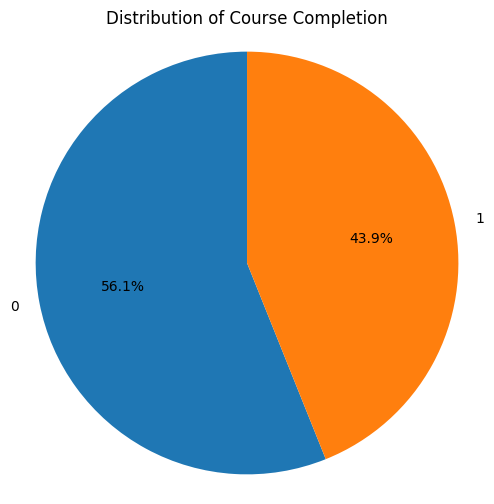

In [11]:
#visualisasi komposisi target - pie chart
plt.figure(figsize=(6,6))
completion_counts = df['CourseCompletion'].value_counts()
plt.pie(completion_counts, labels=completion_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Course Completion')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

pie chart diatas menunjukkan distribusi student berdasarkan persentase complition course
- 56.1 % tidak menyelesaikan course
- 43.9 % menyelesaikan course

In [12]:
completed_counts = (
    df[df['CourseCompletion'] == 1]
    .groupby('CourseCategory')
    .size()
    .reset_index(name='Completed_Count')
    .sort_values('Completed_Count', ascending=False)
)

completed_counts

,CourseCategory,Completed_Count
3,Programming,735
1,Business,733
4,Science,710
0,Arts,699
2,Health,691


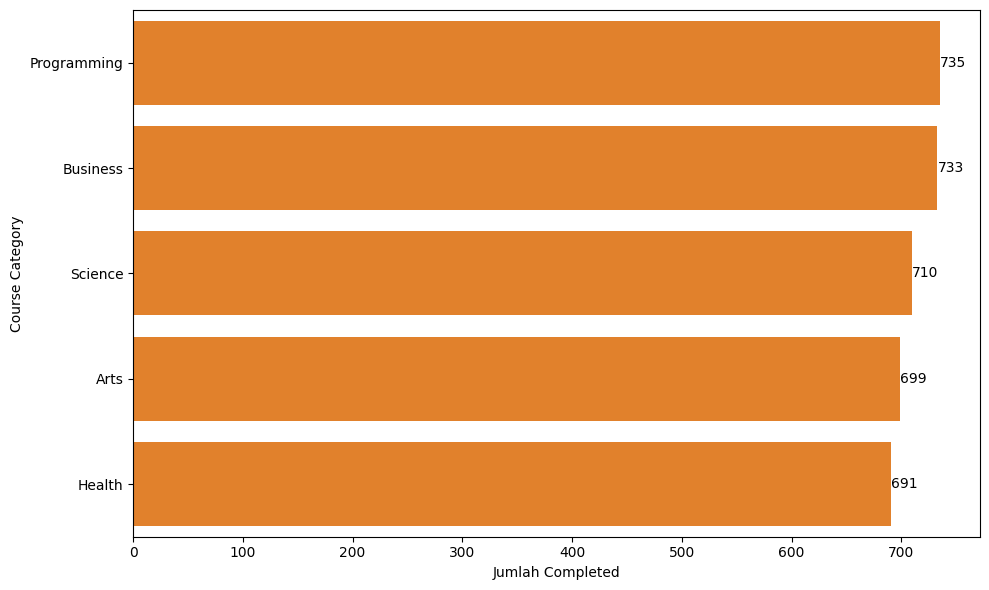

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=completed_counts,
    y='CourseCategory',
    x='Completed_Count',
    color='#ff7f0e'
)

for i, v in enumerate(completed_counts['Completed_Count']):
    ax.text(v, i, str(v), va='center', ha='left')

plt.xlabel('Jumlah Completed')
plt.ylabel('Course Category')
plt.tight_layout()
plt.show()

In [14]:
not_completed_counts = (
    df[df['CourseCompletion'] == 0]
    .groupby('CourseCategory')
    .size()
    .reset_index(name='Not_Completed_Count')
    .sort_values('Not_Completed_Count', ascending=False)
)

not_completed_counts

,CourseCategory,Not_Completed_Count
2,Health,943
1,Business,924
4,Science,919
3,Programming,898
0,Arts,871


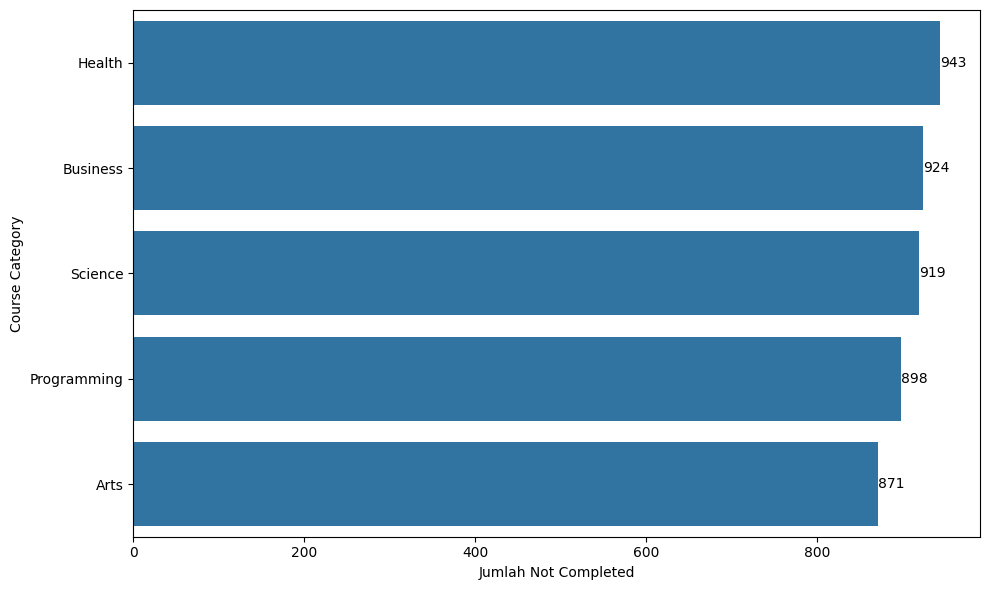

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=not_completed_counts,
    y='CourseCategory',
    x='Not_Completed_Count',
    color='#1f77b4'
)

# Tambah angka (super simple)
for i, v in enumerate(not_completed_counts['Not_Completed_Count']):
    ax.text(v, i, str(v), va='center', ha='left')

plt.xlabel('Jumlah Not Completed')
plt.ylabel('Course Category')
plt.tight_layout()
plt.show()

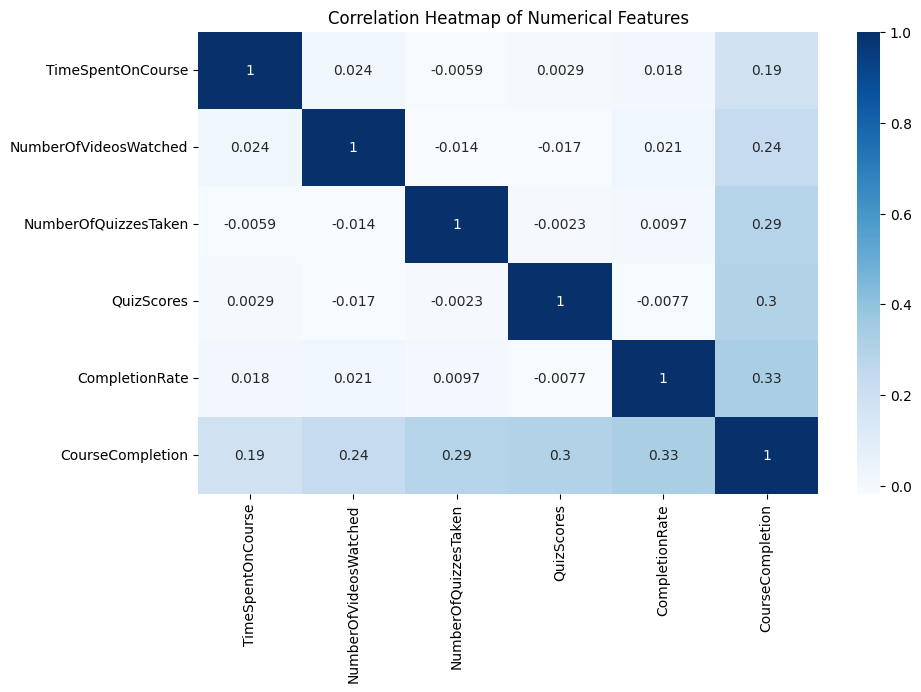

In [16]:
num_features = [
    'TimeSpentOnCourse',
    'NumberOfVideosWatched',
    'NumberOfQuizzesTaken',
    'QuizScores',
    'CompletionRate',
    'CourseCompletion'
]

plt.figure(figsize=(10,6))
sns.heatmap(df[num_features].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

dari visualisasi heatmap dapat disimpulkan,
1. korelasi antar fitur tidak ada yang tinggi, artinya tidak ada multicolinearitas pada kolom numerik (sudah baik untuk pemodelan)
2. korelasi antara fitur numerik dan target menunjukkan,
> - completion rate, quizscores dan numberofquiztaken sebagai fitur yang memiliki korelasi tertinggi terhadap fitur targer
> - timespendofcourse dan numberofvideoswatched sebagai fitur yang memiliki korelasi yang cukup rendah terhadap fitur target

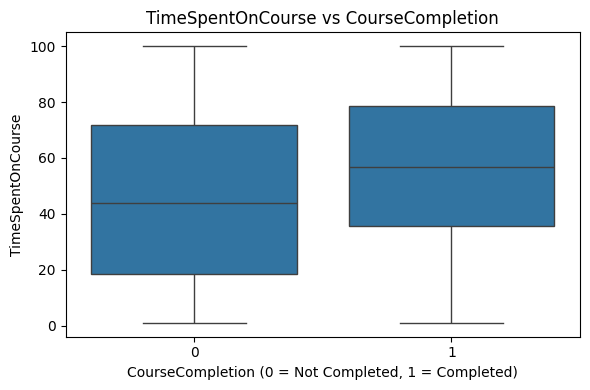

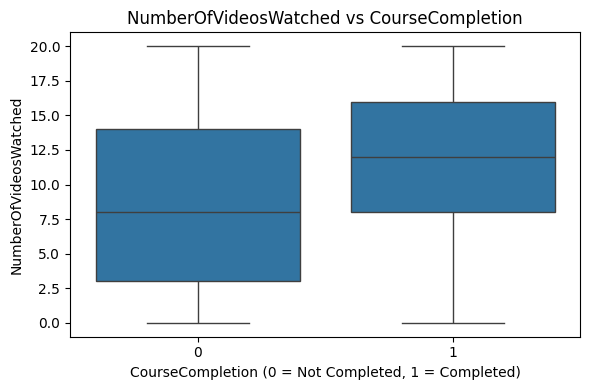

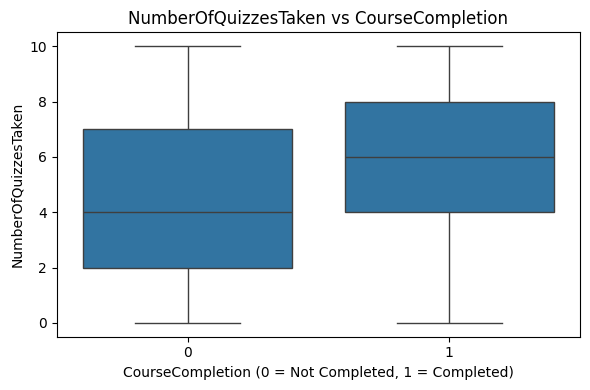

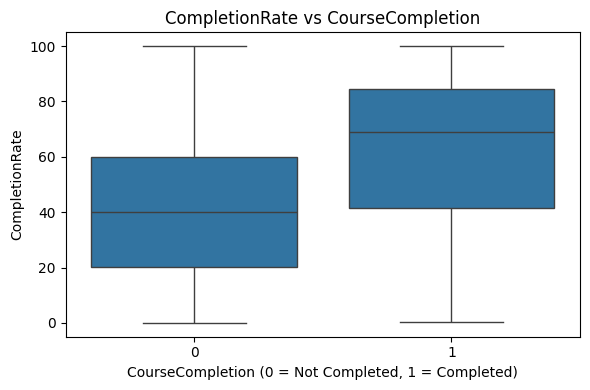

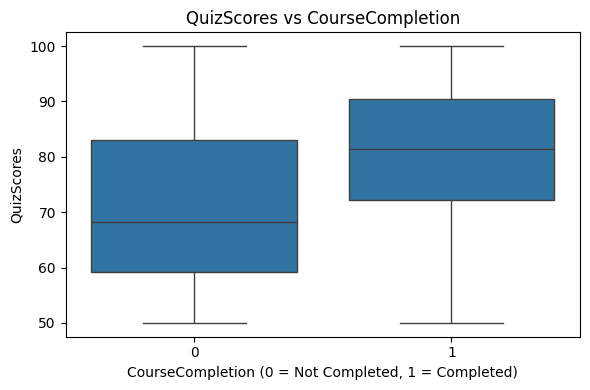

In [17]:

num_cols = [
    'TimeSpentOnCourse',
    'NumberOfVideosWatched',
    'NumberOfQuizzesTaken',
    'CompletionRate',
    'QuizScores'
]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='CourseCompletion', y=col)
    plt.title(f'{col} vs CourseCompletion')
    plt.xlabel("CourseCompletion (0 = Not Completed, 1 = Completed)")
    plt.tight_layout()
    plt.show()

In [18]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = df[(df[col] < lower) | (df[col] > upper)].shape[0]

    print(f"{col}: {outlier_count} outlier")

TimeSpentOnCourse: 0 outlier
NumberOfVideosWatched: 0 outlier
NumberOfQuizzesTaken: 0 outlier
CompletionRate: 0 outlier
QuizScores: 0 outlier


tidak ada fitur yang memiliki outlier

# (5). Data Preprocessing




## Splitting Dataset

In [19]:
#split data menjadi train dan test
df.drop('UserID', axis=1, inplace=True)
X = df.drop('CourseCompletion', axis=1)
y = df['CourseCompletion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)


In [20]:
X_train.shape

(6498, 7)

In [21]:
X_test.shape

(1625, 7)

## Encoding

In [22]:
#encoding kolom course category
# Kolom yang mau di-OHE
ohe_cols = ['CourseCategory']

# Initialize OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train[ohe_cols]),
                           columns=ohe.get_feature_names_out(ohe_cols),
                           index=X_train.index)

X_test_ohe = pd.DataFrame(ohe.transform(X_test[ohe_cols]),
                          columns=ohe.get_feature_names_out(ohe_cols),
                          index=X_test.index)

In [23]:
#Gabungkan hasil
X_train = pd.concat([X_train.drop(ohe_cols, axis=1), X_train_ohe], axis=1)
X_test = pd.concat([X_test.drop(ohe_cols, axis=1), X_test_ohe], axis=1)

In [24]:
X_train.head()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCategory_Arts,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
4905,8.899123,12,1,77.871347,98.100168,0,1.0,0.0,0.0,0.0,0.0
7198,37.721419,8,6,82.151830,73.295115,1,0.0,0.0,0.0,1.0,0.0
6599,43.874940,9,7,81.585410,13.508401,1,0.0,0.0,0.0,1.0,0.0
7802,10.922597,12,1,74.123097,64.957910,1,0.0,0.0,1.0,0.0,0.0
440,70.969763,9,9,70.035522,17.676511,1,0.0,0.0,0.0,0.0,1.0


## Scalling

In [25]:
numeric_cols = ['TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken',
       'QuizScores', 'CompletionRate']

#standar scvaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [26]:
X_train.head()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCategory_Arts,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
4905,-1.485071,0.314404,-1.337705,0.198678,1.617997,0,1.0,0.0,0.0,0.0,0.0
7198,-0.467131,-0.355266,0.261399,0.496907,0.761615,1,0.0,0.0,0.0,1.0,0.0
6599,-0.249802,-0.187849,0.581219,0.457444,-1.302491,1,0.0,0.0,0.0,1.0,0.0
7802,-1.413606,0.314404,-1.337705,-0.062470,0.473777,1,0.0,0.0,1.0,0.0,0.0
440,0.707128,-0.187849,1.220861,-0.347259,-1.158589,1,0.0,0.0,0.0,0.0,1.0


# (6). Modeling

Untuk melakukan pemodelan, saya melakukan 2 perlakuan pengujian , yaitu
> - modeling baselinse tanpa tuning
> - modeling menggunakan tuning

Jenis model yang akan digunakan pada classification dataset ini adalah
> - random forert
> - logistic regression
> - svm
> - decission tree


In [27]:
from sklearn.metrics import recall_score, make_scorer

# Fokus mendeteksi kelas 0 (gagal menyelesaikan course)
scoring_0 = make_scorer(recall_score, pos_label=0)

## logistic regression

* baseline

In [28]:
# Baseline Logistic Regression
logreg_base = LogisticRegression(random_state=42)
logreg_base.fit(X_train, y_train)

y_pred_log_base = logreg_base.predict(X_test)

print("=== BASELINE LOGISTIC REGRESSION ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log_base))
print("Recall kelas 0:", recall_score(y_test, y_pred_log_base, pos_label=0))
print(classification_report(y_test, y_pred_log_base))

=== BASELINE LOGISTIC REGRESSION ===
Accuracy: 0.7913846153846154
Recall kelas 0: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       894
           1       0.78      0.74      0.76       731

    accuracy                           0.79      1625
   macro avg       0.79      0.79      0.79      1625
weighted avg       0.79      0.79      0.79      1625



* tuning

In [29]:
from sklearn.model_selection import GridSearchCV

param_log = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

log_tuned = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid=param_log,
    scoring=scoring_0,
    cv=5,
    n_jobs=-1,
    verbose=1
)

log_tuned.fit(X_train, y_train)

print("\n=== TUNED LOGISTIC REGRESSION ===")
print("Best Params:", log_tuned.best_params_)

y_pred_log_tuned = log_tuned.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log_tuned))
print("Recall kelas 0:", recall_score(y_test, y_pred_log_tuned, pos_label=0))
print(classification_report(y_test, y_pred_log_tuned))

Fitting 5 folds for each of 14 candidates, totalling 70 fits

=== TUNED LOGISTIC REGRESSION ===
Best Params: {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.6196923076923077
Recall kelas 0: 0.9966442953020134
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       894
           1       0.97      0.16      0.27       731

    accuracy                           0.62      1625
   macro avg       0.78      0.58      0.51      1625
weighted avg       0.76      0.62      0.53      1625



## random forest

* baseline

In [30]:
#baseline
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train, y_train)

y_pred_rf_base = rf_base.predict(X_test)

print("\n=== BASELINE RANDOM FOREST ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_base))
print("Recall kelas 0:", recall_score(y_test, y_pred_rf_base, pos_label=0))
print(classification_report(y_test, y_pred_rf_base))


=== BASELINE RANDOM FOREST ===
Accuracy: 0.9587692307692308
Recall kelas 0: 0.9765100671140939
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       894
           1       0.97      0.94      0.95       731

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



* tuning

In [31]:
#tuning
param_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_tuned = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_rf,
    scoring=scoring_0,
    cv=5,
    n_jobs=-1,
    verbose=1
)

rf_tuned.fit(X_train, y_train)

print("\n=== TUNED RANDOM FOREST ===")
print("Best Params:", rf_tuned.best_params_)

y_pred_rf_tuned = rf_tuned.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("Recall kelas 0:", recall_score(y_test, y_pred_rf_tuned, pos_label=0))
print(classification_report(y_test, y_pred_rf_tuned))

Fitting 5 folds for each of 108 candidates, totalling 540 fits

=== TUNED RANDOM FOREST ===
Best Params: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.96
Recall kelas 0: 0.9787472035794184
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       894
           1       0.97      0.94      0.95       731

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



## SVM

* baseline

In [32]:
#baseline
from sklearn.svm import SVC

svm_base = SVC(random_state=42)
svm_base.fit(X_train, y_train)

y_pred_svm_base = svm_base.predict(X_test)

print("\n=== BASELINE SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_base))
print("Recall kelas 0:", recall_score(y_test, y_pred_svm_base, pos_label=0))
print(classification_report(y_test, y_pred_svm_base))


=== BASELINE SVM ===
Accuracy: 0.872
Recall kelas 0: 0.9138702460850112
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       894
           1       0.89      0.82      0.85       731

    accuracy                           0.87      1625
   macro avg       0.87      0.87      0.87      1625
weighted avg       0.87      0.87      0.87      1625



* tuning

In [33]:
#tuning
param_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_tuned = GridSearchCV(
    SVC(random_state=42),
    param_grid=param_svm,
    scoring=scoring_0,
    cv=5,
    n_jobs=-1,
    verbose=1
)

svm_tuned.fit(X_train, y_train)

print("\n=== TUNED SVM ===")
print("Best Params:", svm_tuned.best_params_)

y_pred_svm_tuned = svm_tuned.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svm_tuned))
print("Recall kelas 0:", recall_score(y_test, y_pred_svm_tuned, pos_label=0))
print(classification_report(y_test, y_pred_svm_tuned))

Fitting 5 folds for each of 16 candidates, totalling 80 fits

=== TUNED SVM ===
Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.8953846153846153
Recall kelas 0: 0.9217002237136466
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       894
           1       0.90      0.86      0.88       731

    accuracy                           0.90      1625
   macro avg       0.90      0.89      0.89      1625
weighted avg       0.90      0.90      0.90      1625



## decision tree


* baseline

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)

y_pred_dt_base = dt_base.predict(X_test)

print("\n=== BASELINE DECISION TREE ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_base))
print("Recall kelas 0:", recall_score(y_test, y_pred_dt_base, pos_label=0))
print(classification_report(y_test, y_pred_dt_base))


=== BASELINE DECISION TREE ===
Accuracy: 0.9107692307692308
Recall kelas 0: 0.912751677852349
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       894
           1       0.89      0.91      0.90       731

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625



* tuning

In [35]:
param_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_tuned = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_dt,
    scoring=scoring_0,
    cv=5,
    n_jobs=-1,
    verbose=1
)

dt_tuned.fit(X_train, y_train)

print("\n=== TUNED DECISION TREE ===")
print("Best Params:", dt_tuned.best_params_)

y_pred_dt_tuned = dt_tuned.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt_tuned))
print("Recall kelas 0:", recall_score(y_test, y_pred_dt_tuned, pos_label=0))
print(classification_report(y_test, y_pred_dt_tuned))

Fitting 5 folds for each of 72 candidates, totalling 360 fits

=== TUNED DECISION TREE ===
Best Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.96
Recall kelas 0: 0.9787472035794184
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       894
           1       0.97      0.94      0.95       731

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



# (7). Features Importance

Dikarenakan model yang digunakan bersifat non-interpretable, gunakan metode model-agnostic seperti:
- Permutation Feature Importance + Partial Dependence Plot, atau
- Shapley Additive Value Feature Importance + Shapley Dependence Plot

In [36]:
import dalex as dx
import shap

#dalex
rf_exp = dx.Explainer(
    rf_tuned,
    X_train,
    y_train,
    label="Random Forest"
)

Preparation of a new explainer is initiated

  -> data              : 6498 rows 11 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 6498 values
  -> model_class       : sklearn.model_selection._search.GridSearchCV (default)
  -> label             : Random Forest
  -> predict function  : <function yhat_proba_default at 0x78176aa811c0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00143, mean = 0.437, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.838, mean = -0.000739, max = 0.835
  -> model_info        : package sklearn

A new explainer has been created!


In [37]:
# Permutation Feature Importance
fi_rf = rf_exp.model_parts()
fi_rf.plot()

# (8). Kesimpulan dan Rekomendasi

Kesimpulan dan Rekomendasi
1. Adanya perbedaan pola perilaku engagment antara 2 kelompok, yaitu kelompok completed dan non completed
2. dari keseluruhan student yang ada, ada 56.1% student tidak menyelesaikan kursus dan sisanya 43.9% menyelesaikan kursus
3. kategori kursus yang paling banyak menyelesaikan kursus adalah programming dan business
4. kategori kursus yang paling banyak tidak menyelesaikan kursus adalah health dan business
5. model terbaik yang bisa digunakan untuk memprediksi kelulusan dari student kursus platform online adalah model random forest (tuning)
6. tingkat akurasi model rf dalam mendeteksi kelas 0 yaitu 0.979 dan kelas 1 sebesar 0.944, lebih tinggi dibandingkan model lain
7. faktor/fitur yang berperan penting dalam memprediksi kelulusan student adalah completion rate, quiz score dan number of quiz taken
8. faktor/fitur yang kurang memberikan impact pada prediksi kelulusan student adalah device type dan course category

rekomendasi :
1. Tingkatkan completion rate siswa. Dorong siswa untuk menyelesaikan setiap modul atau bab materi melalui reminder progress, gamifikasi (badges, rewards), atau notifikasi otomatis ketika progress stagnan. Completion rate adalah indikator paling krusial untuk mendorong kelulusan.

2. Lakukan intervensi dini untuk siswa berisiko tidak menyelesaikan kursus Sistem dapat mendeteksi siswa dengan pola seperti:
> - progress sudah tinggi (>80%) tapi skor kuis rendah
> - jumlah kuis yang dikerjakan sedikit
> - aktivitas belajar melemah mendekati akhir kursus

Tindak lanjut yang bisa dilakukan:
> - tawarkan remedial quiz
> - rekomendasikan kuis tambahan
> - kirimkan personalized feedback atas performa kuis
> - hubungi secara proaktif agar mereka tidak kehilangan motivasi


# (9). Save Model Prediksi

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_cols = ['TimeSpentOnCourse','NumberOfVideosWatched','NumberOfQuizzesTaken',
                'QuizScores','CompletionRate']
cat_cols = ['CourseCategory']
target = 'CourseCompletion'

preprocessing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocess', preprocessing),
    ('model', rf_tuned.best_estimator_)   # model dari GridSearch
])

In [40]:
pipeline.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['TimeSpentOnCourse',
                                                   'NumberOfVideosWatched',
                                                   'NumberOfQuizzesTaken',
                                                   'QuizScores',
                                                   'CompletionRate']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['CourseCategory'])])),
                ('model',
                 RandomForestClassifier(min_samples_leaf=4, random_state=42))])

In [41]:
import joblib
joblib.dump(pipeline, "rf_pipeline.pkl", protocol=4)

['rf_pipeline.pkl']

In [37]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# ============================
# 1. Ambil model terbaik
# ============================
final_model = rf_tuned.best_estimator_

# ============================
# 2. Tentukan columns
# ============================
numeric_cols = [
    'TimeSpentOnCourse',
    'NumberOfVideosWatched',
    'NumberOfQuizzesTaken',
    'QuizScores',
    'CompletionRate'
]

ohe_cols = ['CourseCategory']

# ============================
# 3. Preprocessor
# ============================
preprocessing = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ohe_cols)
    ],
    remainder='passthrough'  # DeviceType tetap
)

# ============================
# 4. Buat pipeline final
# ============================
pipe = Pipeline([
    ('preprocess', preprocessing),
    ('model', final_model)
])

# ============================
# 5. Fit ulang ke data RAW
# ============================
X_raw = df.drop('CourseCompletion', axis=1)
y_raw = df['CourseCompletion']

pipe.fit(X_raw, y_raw)

# ============================
# 6. Save pipeline final
# ============================
joblib.dump(pipe, "rf_pipeline.pkl")

['rf_pipeline.pkl']

In [38]:
import sklearn
sklearn.__version__

'1.6.1'

In [2]:
import sklearn
sklearn.__version__

'1.6.1'

In [44]:
import sys
print(sys.version)

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [45]:
!python --version

Python 3.12.12
